In [1]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

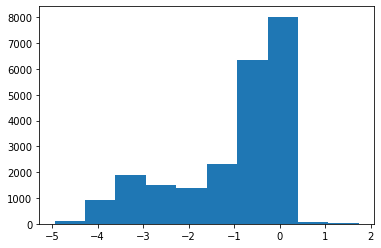

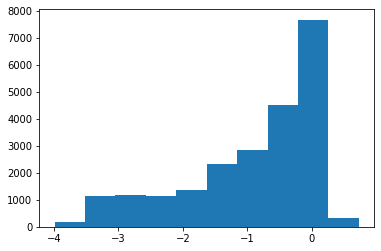

In [2]:
# Y label will be varient coloring
wuhan_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/wuhan_adj_mat_encoding.npy'
alpha_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/alpha_adj_mat_encoding.npy'
beta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/beta_adj_mat_encoding.npy'
delta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/delta_adj_mat_encoding.npy'
eta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/eta_adj_mat_encoding.npy'
omicron_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/OmicronBA1_adj_mat_encoding.npy'



wuhan_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/wuhan_one_hot_encoding.npy'
alpha_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/alpha_one_hot_encoding.npy'
beta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/beta_one_hot_encoding.npy'
delta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/delta_one_hot_encoding.npy'
eta_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/eta_one_hot_encoding.npy'
omicron_path = '/mnt/ncshare/ozkilim/charge_pca_deepmut/embeddings/OmicronBA1_one_hot_encoding.npy'



def unpack(embedding_path,varient_number):
    dataset = np.load(embedding_path ,allow_pickle=True)
    dataset= dataset[~np.isnan(dataset).any(axis=1)]
    # X = dataset[:,:-2]
    X = dataset
    X= X[~np.isnan(X).any(axis=1)] #Drop nans here.
    # Add extra column for varient type..
    a = np.ones(len(X))*varient_number
    a = np.expand_dims(a, axis=1)
    X = np.hstack((X, a))
    return X

wuhan = unpack(wuhan_path,0)
alpha = unpack(alpha_path,1)
beta = unpack(beta_path,2)
delta = unpack(delta_path,3)
eta = unpack(eta_path,4)
omicron = unpack(omicron_path,5)

X = np.vstack((wuhan,alpha,beta,delta,eta,omicron))
coloring = X[:,-1]
expression = X[:,-2:-1]
binding = X[:,-3:-2]

X = X[:,:-3]

plt.hist(expression)
plt.show()
plt.hist(binding)
plt.show()
#check we get the values corrrectly... threshold them now?...or just plot continuous value... 

In [3]:
tsne = TSNE(n_jobs=4)
Y = tsne.fit_transform(X)

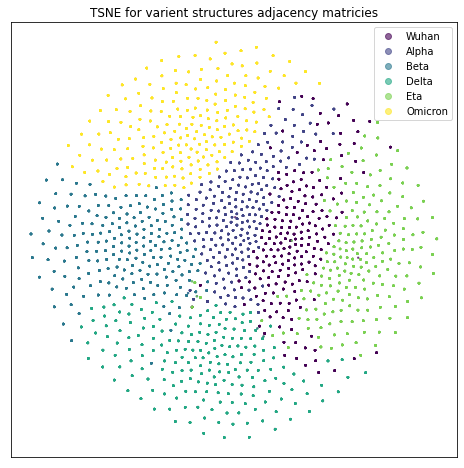

In [8]:
est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
est.fit(binding)
binding_descrete = est.transform(binding)


est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
est.fit(expression)
expression_descrete = est.transform(expression)


fig = plt.figure(figsize=(8,8))

scatter = plt.scatter(Y[:,0], Y[:,1], c = coloring, s = 2,alpha=0.6)
plt.title("TSNE for varient structures adjacency matricies")

plt.xticks([])
plt.yticks([])
#make ledgend by coling..
names_vec = ["Wuhan","Alpha","Beta","Delta","Eta","Omicron"]

# plt.legend(labels=names_vec)
# plt.colorbar()

plt.legend(handles=scatter.legend_elements()[0], labels=names_vec)
# Clusters? color by phenotype?... interesting if true... do coloring more correctly...
fig.savefig("./reasults_figs/TSNE_FASTA.png",facecolor='white', transparent=False)
# Clusters? color by phenotype?... interesting if true... do coloring more correctly...

In [5]:
print(coloring.mean())



color parts by phenotype binary values... for each one... dark and light version.... becuase there are intersting splits here for each mutant.. 




SyntaxError: invalid syntax (<ipython-input-5-0feef03cc6ae>, line 5)